<a href="https://colab.research.google.com/github/mostafa-asefy/neural-networks-from-zero/blob/main/Artificial_Neural_Networks_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Class Definition

In [30]:
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt


class NeuralNetwork:

    # راه اندازی شبکه عصبی 
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # تعیین تعداد نورون‌های لایه‌های مختلف
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # تعیین نرخ یادگیری
        self.learning_rate = learning_rate
        
        # ایجاد تابع فعال سازی که اینجا سیگموییدی است ولی می تواند متفاوت باشد
        self.activation_function = lambda x : expit(x)

        # ایجاد دو ماتریس وزن‌های اولیه
        # یکی برای وزن‌های بین لایه ورودی و مخفی و یکی برای وزن‌های بین لایه مخفی و خروجی 
        # هر وزن با ایندکس آی و جی، وزن اتصال بین نورون آی از لایه مبدا به نورون جی در لایه مقصد است.
        #  و به همین ترتیب w12 w21 مثلا
        self.w_i_h = np.random.default_rng().normal(0, pow(self.input_nodes, -0.5),
                                                    (self.hidden_nodes, self.input_nodes))
        self.w_h_o = np.random.default_rng().normal(0, pow(self.hidden_nodes, -0.5),
                                                    (self.output_nodes, self.hidden_nodes))
        pass


    # محاسبه خروجی شبکه با دادن ورودی - پیش خور
    def query(self, input_list):
        # تبدیل لیست مقادیر ورودی به آرایه دوبعدی
        inputs = np.array(input_list, ndmin=2).T

        # محاسبه سیگنال ورودی و سپس خروجی لایه مخفی
        x_hidden = np.dot(self.w_i_h, inputs)
        o_hidden = self.activation_function(x_hidden)

        # محاسبه سیگنال ورودی و سپس خروجی لایه خروجی
        x_output = np.dot(self.w_h_o, o_hidden)
        o_output = self.activation_function(x_output)

        return o_output


    # یادگیری شبکه بر اساس یک نمونه ورودی/خروجی - پس انتشار
    def train(self, input_list, targets_list):
        # محاسبه سیگنال‌های ورودی و خروجی لایه‌ها
        inputs = np.array(input_list, ndmin=2).T

        x_hidden = np.dot(self.w_i_h, inputs)
        o_hidden = self.activation_function(x_hidden)

        x_output = np.dot(self.w_h_o, o_hidden)
        o_output = self.activation_function(x_output)

        #محاسبه خطای شبکه بر اساس اختلاف خروجی با هدف‌ها
        targets = np.array(targets_list, ndmin=2).T
        output_errors = targets - o_output
        #پس انتشار خطای شبکه روی نورون‌های لایه مخفی
        hidden_errors = np.dot(self.w_h_o.T, output_errors)

        # محاسبه وزن‌های جدید اتصال‌ها با گرادیان کاهشی
        self.w_h_o += self.learning_rate * np.dot((output_errors * o_output * (1-o_output)), o_hidden.T)
        self.w_i_h += self.learning_rate * np.dot((hidden_errors * o_hidden * (1-o_hidden)), inputs.T)
        
        


# Neural Network Instance Creation

In [21]:
# فراخوانی داده‌های آموزش از دیتاست امنیست
from google.colab import drive
drive.mount('/content/drive')
train_file= open('/content/drive/MyDrive/mnist/mnist_train_100.csv', 'r')
train_list = train_file.readlines()
train_file.close()

# فراخوانی داده‌های آزمایش از دیتاست امنیست
test_file= open('/content/drive/MyDrive/mnist/mnist_test_10.csv', 'r')
test_list = test_file.readlines()
test_file.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# تعیین تعداد نورون‌ها در هر لایه
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# تعیین نرخ یادگیری شبکه
learning_rate = 0.3 

# ساخت نمونه از شبکه عصبی با معماری بالا
nn = NeuralNetwork(input_nodes=input_nodes,
                   hidden_nodes=hidden_nodes, output_nodes= output_nodes, 
                   learning_rate=learning_rate)
# print("initial weights (W_input_hidden): ", nn.w_i_h)

# آموزش شبکه ساخته شده با داده‌های آموزشی امنیست 
for row in train_list: 
   row_data = row.split(',') 
   inputs = (np.asfarray(row_data[1:]) / (255.0 * 0.99)) + 0.01
   targets = np.zeros(output_nodes) + 0.01
   targets[int(row_data[0])] = 0.99
   nn.train(inputs, targets)
# print("\n\nweights (W_input_hidden) after a round of training: ", nn.w_i_h)


Taget number is:  7


array([[0.13414528],
       [0.14297912],
       [0.04621692],
       [0.20750338],
       [0.16499409],
       [0.04407173],
       [0.0372503 ],
       [0.3894807 ],
       [0.12213798],
       [0.08470759]])

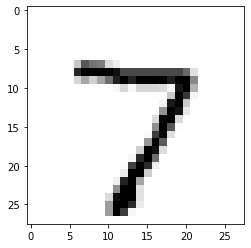

In [32]:
# آزمایش شبکه ساخته شده با یکی از داده‌های مجموعه آزمایشی 

# انتخاب یکی از داده‌ها و نمایش نام و تصویر آن
test_row_data = test_list[0].split(',')
print("Taget number is: ", test_row_data[0])
image_data = np.asfarray(test_row_data[1:]).reshape((28,28))
image = plt.imshow(image_data, cmap='Greys')

# بررسی پیش بینی شبکه از داده انتخاب شده
nn.query((np.asfarray(test_row_data[1:]) / (255.0 * 0.99)) + 0.01)

In [38]:
# آزمایش عملکرد شبکه به لحاظ پیش بینی همه داده‌های آزمایشی
score_card = []
for row in test_list:
    row_data = row.split(',')
    target_number = int(row_data[0])
    inputs = (np.asfarray(row_data[1:]) / 255 * 0.99) + 0.01 
    outputs = nn.query(inputs)
    predicted_number = np.argmax(outputs)
    print("\nTarget Number: ", target_number)
    print("Predicted Number: ", predicted_number)
    if(target_number == predicted_number):
        score_card.append(1)
    else:
        score_card.append(0)

# گزارش عملکرد شبکه
print("\n\nNet Score Card: ",score_card)
score_card_array = np.asarray(score_card)
print("\Net Performance: ", score_card_array.sum() / score_card_array.size)


Target Number:  7
Predicted Number:  7

Target Number:  2
Predicted Number:  3

Target Number:  1
Predicted Number:  1

Target Number:  0
Predicted Number:  0

Target Number:  4
Predicted Number:  4

Target Number:  1
Predicted Number:  1

Target Number:  4
Predicted Number:  4

Target Number:  9
Predicted Number:  3

Target Number:  5
Predicted Number:  1

Target Number:  9
Predicted Number:  7


Total Score Card:  [1, 0, 1, 1, 1, 1, 1, 0, 0, 0]

Total Performance:  0.6
